# Pembobotan Kata

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('./tweets_clean2.csv')

In [3]:
df.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet,sentiments,clean_text
0,Acute_Hospital_MD,Ireland,University Hospital Consultant. Clinical Lec...,2012-12-04 09:30:06,5696,3667,32465,False,2020-08-11 09:20:04,🦠20 million case of #COVID19 cases worldwide. ...,['COVID19'],Twitter for iPhone,False,positive,"['million', 'case', 'covid', 'case', 'worldwid..."
1,الشارقة24,دولة الإمارات العربية المتحدة,الشارقة 24 هو موقع إلكتروني إخباري تابع لحكومة...,2014-11-11 06:44:55,32303,317,12,True,2020-08-17 05:44:47,#China grants country's first #COVID19 vaccine...,"['China', 'COVID19', 'Sharjah24']",Twitter Web App,False,positive,"['china', 'grant', 'country', 'first', 'covid'..."
2,J Wood,NaN,Locked out of main account regularly getting s...,2020-05-26 06:56:14,148,348,4842,False,2020-08-01 16:19:46,@RishiSunak @Keir_Starmer give #50swomen our P...,"['50swomen', 'coronavirus', 'COVID19']",Twitter Web App,False,positive,"['rishisunak', 'keir', 'starmer', 'give', 'swo..."
3,Afzal Bhuiyan,Bangladesh,NaN,2013-06-06 11:06:02,91,85,20,False,2020-07-25 09:22:35,"As long as #COVID19 is circulating, we are all...",['COVID19'],Twitter for Android,False,positive,"['long', 'covid', 'circulate', 'risk', 'thats'..."
4,Angela Leung,Hong Kong,"Associate Professor, School of Nursing, The Ho...",2016-11-16 14:38:19,114,106,78,False,2020-08-22 08:15:46,We try our best to support the frontline worke...,NaN,Twitter for iPhone,False,positive,"['try', 'best', 'support', 'frontline', 'worke..."


In [4]:
df.shape

(2000, 15)

In [5]:
df.shape

(2000, 15)

In [6]:
df.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet,sentiments,clean_text
0,Acute_Hospital_MD,Ireland,University Hospital Consultant. Clinical Lec...,2012-12-04 09:30:06,5696,3667,32465,False,2020-08-11 09:20:04,🦠20 million case of #COVID19 cases worldwide. ...,['COVID19'],Twitter for iPhone,False,positive,"['million', 'case', 'covid', 'case', 'worldwid..."
1,الشارقة24,دولة الإمارات العربية المتحدة,الشارقة 24 هو موقع إلكتروني إخباري تابع لحكومة...,2014-11-11 06:44:55,32303,317,12,True,2020-08-17 05:44:47,#China grants country's first #COVID19 vaccine...,"['China', 'COVID19', 'Sharjah24']",Twitter Web App,False,positive,"['china', 'grant', 'country', 'first', 'covid'..."
2,J Wood,NaN,Locked out of main account regularly getting s...,2020-05-26 06:56:14,148,348,4842,False,2020-08-01 16:19:46,@RishiSunak @Keir_Starmer give #50swomen our P...,"['50swomen', 'coronavirus', 'COVID19']",Twitter Web App,False,positive,"['rishisunak', 'keir', 'starmer', 'give', 'swo..."
3,Afzal Bhuiyan,Bangladesh,NaN,2013-06-06 11:06:02,91,85,20,False,2020-07-25 09:22:35,"As long as #COVID19 is circulating, we are all...",['COVID19'],Twitter for Android,False,positive,"['long', 'covid', 'circulate', 'risk', 'thats'..."
4,Angela Leung,Hong Kong,"Associate Professor, School of Nursing, The Ho...",2016-11-16 14:38:19,114,106,78,False,2020-08-22 08:15:46,We try our best to support the frontline worke...,NaN,Twitter for iPhone,False,positive,"['try', 'best', 'support', 'frontline', 'worke..."


# 1) TF dan IDF

In [7]:
from collections import Counter

data = df['clean_text']

tweet_dict = {}
i =0
for corpus in data :
    tweet_dict[i] = eval(corpus)
    i+=1

i=0
#Menyimpan skor TF dengan " key indeks : { kata unik : skor tf ...}
TF = {}
for corpus, val in tweet_dict.items() :
    word_counts = {}
    for word in set(val) : # set digunakan untuk mengisi kata-kata unique/ menghindari kata duplikat
        word_counts[word] = float(val.count(word)/len(val))
        # word_counts[word] = str(f"{val.count(word)} : {len(val)}")

    TF[i] = word_counts
    i +=1
        

In [8]:
TF[47]

{'big': 0.07692307692307693,
 'link': 0.07692307692307693,
 'lazmi': 0.07692307692307693,
 'right': 0.07692307692307693,
 'latest': 0.07692307692307693,
 'khabar': 0.07692307692307693,
 'top': 0.07692307692307693,
 'hit': 0.07692307692307693,
 'break': 0.07692307692307693,
 'desk': 0.07692307692307693,
 'news': 0.15384615384615385,
 'bulletin': 0.07692307692307693}

In [9]:
# MenghituNG IDF

from math import log

#Hitung jumlah dokumen
N = len(tweet_dict)

#Buat Dictionary untuk menyimpan jumlah dokumen yang mengandung setiap kata
doc_freq = {}
for corpus in tweet_dict.values() :
    for word in set(corpus) :
        doc_freq[word] = doc_freq.get(word, 0)+1
        #Jika kata sudah ada dalam doc_freq, maka nilai frekuensi dokumen untuk kata tersebut ditambah 1. Jika kata belum ada dalam doc_freq, maka kata tersebut ditambahkan ke doc_freq dengan nilai 1. Fungsi get() digunakan untuk mengambil nilai dari suatu kunci dalam dictionary. Jika kunci tidak ada, maka nilai default yang diberikan (dalam hal ini 0) akan dikembalikan.


In [10]:
doc_freq.get('covid')

1230

In [11]:
# Menghitung IDF 
IDF = {}
for word, freq in doc_freq.items() :
    IDF[word] = log(N / freq)

In [12]:
IDF.get('covid')

0.48613301117561913

In [13]:
# Menghitung TF-IDF

TFIDF = {}
for i, word_counts in TF.items() :
    tfidf_scores = {}
    for word, tf in word_counts.items() :
        tfidf_scores[word] = tf * IDF[word]
    TFIDF[i] = tfidf_scores

In [14]:
TFIDF

{0: {'increase': 0.358189498490434,
  'st': 0.3873810078523497,
  'new': 0.20678827490815618,
  'million': 0.35424386046062245,
  'people': 0.22668785456804302,
  'case': 0.5407862509648387,
  'past': 0.38168039460975567,
  'worldwide': 0.3935381392118525,
  'ireland': 0.4349994084989822,
  'week': 0.376373250649221,
  'covid': 0.03739484701350917},
 1: {'china': 0.5781119096381901,
  'cansino': 0.844544717726898,
  'grant': 0.6454603322571142,
  'patent': 0.844544717726898,
  'vaccine': 0.4266335937609466,
  'sharjah': 0.844544717726898,
  'covid': 0.05401477901951324,
  'first': 0.4403684777572996,
  'country': 0.4666338975422141},
 2: {'keir': 0.5846848045801603,
  'starmer': 0.5846848045801603,
  'pension': 0.5846848045801603,
  'give': 0.716378996980868,
  'job': 0.36234851551122443,
  'coronavirus': 0.2013304490641343,
  'rishisunak': 0.5001761669903055,
  'protect': 0.35049077090912767,
  'yo': 0.46088188823907555,
  'covid': 0.03739484701350917,
  'us': 0.25898430422652485,
  '

In [15]:
for i, word_scores in TFIDF.items():
    if 'smart' in word_scores:
        print(f'Indeks Tweets ke {i}: {word_scores["smart"]}')


Indeks Tweets ke 488: 1.266817076590347


# 2) Important Words

In [16]:
for i, word_scores in TFIDF.items():
    important_words = sorted(word_scores.items(), key=lambda x: x[1], reverse=True)[:10]
    print(f'Dokumen {i} : {important_words}')
    if i == 10 :
        break

Dokumen 0 : [('case', 0.5407862509648387), ('ireland', 0.4349994084989822), ('worldwide', 0.3935381392118525), ('st', 0.3873810078523497), ('past', 0.38168039460975567), ('week', 0.376373250649221), ('increase', 0.358189498490434), ('million', 0.35424386046062245), ('people', 0.22668785456804302), ('new', 0.20678827490815618)]
Dokumen 1 : [('cansino', 0.844544717726898), ('patent', 0.844544717726898), ('sharjah', 0.844544717726898), ('grant', 0.6454603322571142), ('china', 0.5781119096381901), ('country', 0.4666338975422141), ('first', 0.4403684777572996), ('vaccine', 0.4266335937609466), ('covid', 0.05401477901951324)]
Dokumen 2 : [('give', 0.716378996980868), ('keir', 0.5846848045801603), ('starmer', 0.5846848045801603), ('pension', 0.5846848045801603), ('swomen', 0.5846848045801603), ('rishisunak', 0.5001761669903055), ('yo', 0.46088188823907555), ('job', 0.36234851551122443), ('protect', 0.35049077090912767), ('us', 0.25898430422652485)]
Dokumen 3 : [('circulate', 0.690775527898213

# 3) Visualization

In [17]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# tfidf_scores = TFIDF[0]

# wordcloud = WordCloud(width=1000, height=500, background_color='white').generate_from_frequencies(tfidf_scores)

# plt.figure(figsize=(15,8))
# plt.imshow(wordcloud)
# plt.axis('off')
# plt.show()

# words = list(tfidf_scores.keys())
# scores = list(tfidf_scores.values())

# plt.figure(figsize=(10,5))
# plt.bar(words[:10], scores[:10])

# plt.show()

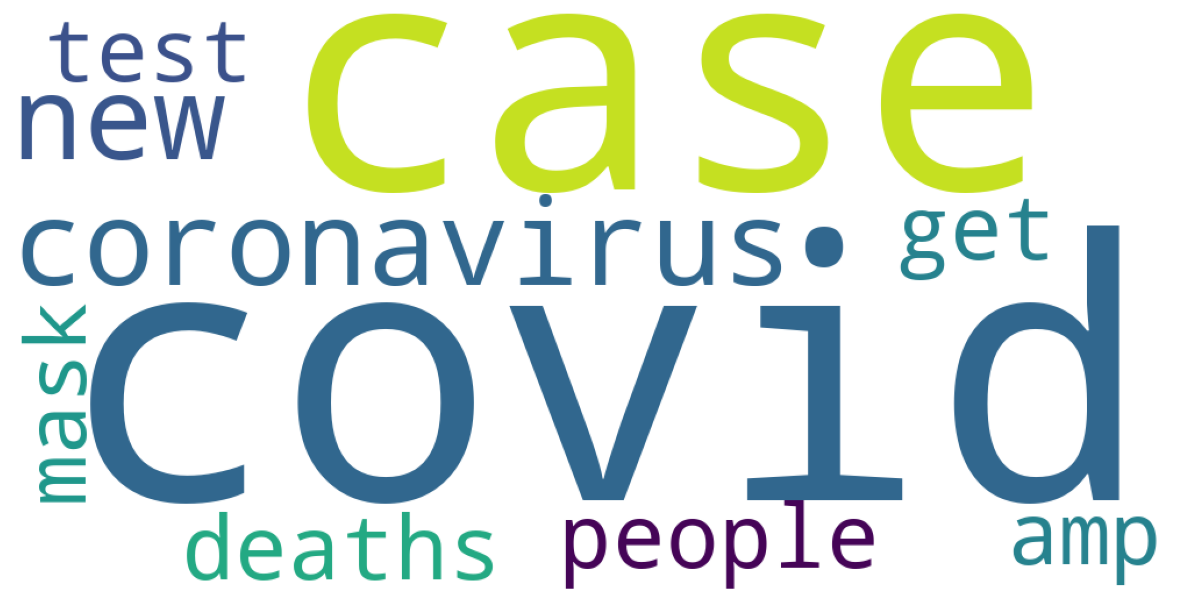

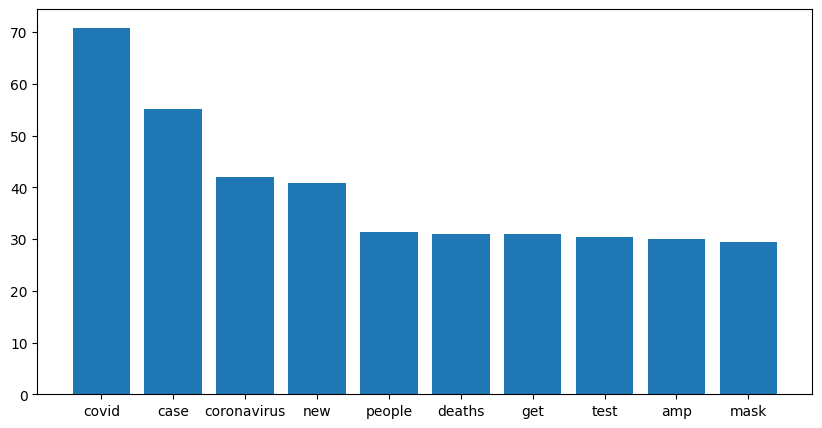

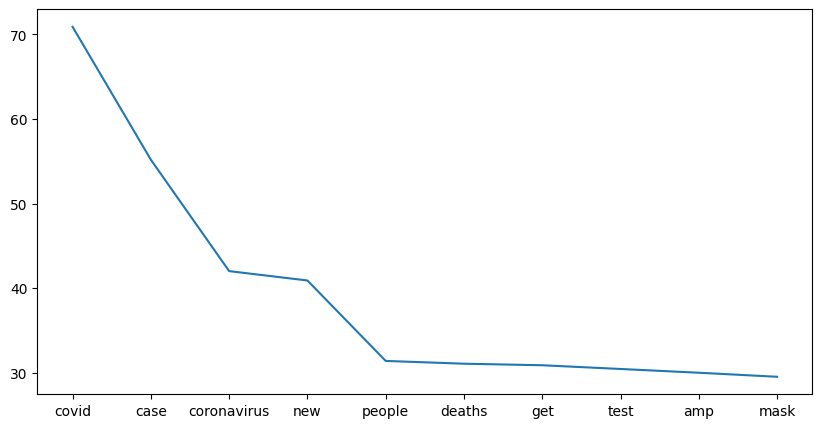

In [18]:
from collections import Counter

#gabungkan semua skor TF-IDF
all_scores = Counter()
for word_scores in TFIDF.values():
    all_scores.update(word_scores)

#Ambil 10 kata dengan skor tertinggi
top_words = all_scores.most_common(10)

#wordcloud
wordcloud = WordCloud(width=1000, height=500, background_color='white').generate_from_frequencies(dict(top_words))

plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

#Plot Batang
words,scores = zip(*top_words)
#unzip list dari tuple

plt.figure(figsize=(10,5))
plt.bar(words, scores)
plt.show()

#Plot Kurva
plt.figure(figsize=(10,5))
plt.plot(words, scores)
plt.show()
    

In [19]:
print(data.head())

0    ['million', 'case', 'covid', 'case', 'worldwid...
1    ['china', 'grant', 'country', 'first', 'covid'...
2    ['rishisunak', 'keir', 'starmer', 'give', 'swo...
3    ['long', 'covid', 'circulate', 'risk', 'thats'...
4    ['try', 'best', 'support', 'frontline', 'worke...
Name: clean_text, dtype: object


# 4) Membuat Kolom Sentiments

In [20]:
# from textblob import TextBlob

# sentiments = []
# for text in data :
#     text = ' '.join(eval(text))
#     blob = TextBlob(text)
#     sentiment = blob.sentiment.polarity
#     if sentiment > 0 :
#         sentiments.append('positive')
#     elif sentiment < 0 :
#         sentiments.append('negative')
#     else :
#         sentiments.append('neutral')

# df['sentiments']= sentiments

# import nltk
# from nltk.sentiment.vader import SentimentIntensityAnalyzer

# nltk.download('vader_lexicon')

# sia = SentimentIntensityAnalyzer()

# sentiments = []
# for text in data:
#     text = ' '.join(eval(text))
#     sentiment = sia.polarity_scores(text)
#     if sentiment['compound'] > 0:
#         sentiments.append('positive')
#     elif sentiment['compound'] < 0:
#         sentiments.append('negative')
#     else:
#         sentiments.append('neutral')

# df['sentiments'] = sentiments


In [21]:
df.iloc[109]

user_name                    Scarlett--Good Trouble. Let's Make Some.
user_location                                      The Queen City, NC
user_description    Identifying Badass-ery everywhere, but once th...
user_created                                      2019-01-14 02:55:13
user_followers                                                    153
user_friends                                                      698
user_favourites                                                 10505
user_verified                                                   False
date                                              2020-07-26 06:50:43
text                Yeah, it's like they thought if they made fun ...
hashtags                                                  ['COVID19']
source                                            Twitter for Android
is_retweet                                                      False
sentiments                                                   positive
clean_text          

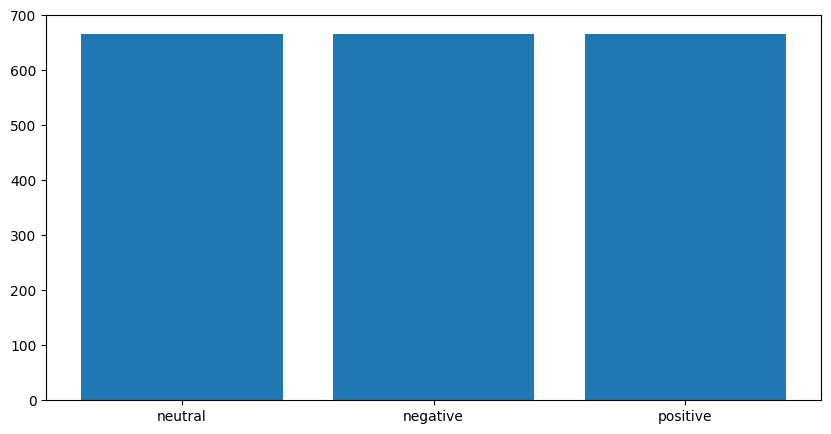

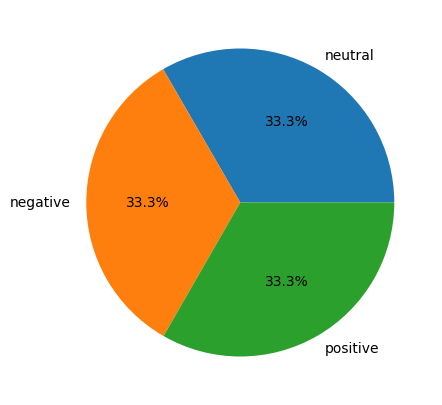

In [22]:
import matplotlib.pyplot as plt

# misalkan ini adalah data sentimen Anda
sentiments = df['sentiments']

# hitung jumlah setiap sentimen
sentiment_counts = sentiments.value_counts()

# buat diagram batang
plt.figure(figsize=(10,5))
plt.bar(sentiment_counts.index, sentiment_counts.values)
plt.show()

# atau buat diagram pie
plt.figure(figsize=(10,5))
plt.pie(sentiment_counts.values, labels=sentiment_counts.index, autopct='%1.1f%%')
plt.show()


In [23]:
sentiments_mapping = {
    'neutral' : 1,
    'positive' : 0, 
    'negative' : 2
}

df['sentiments'] = df['sentiments'].map(sentiments_mapping)

In [24]:
print(df.head())

           user_name                  user_location  \
0  Acute_Hospital_MD                        Ireland   
1          الشارقة24  دولة الإمارات العربية المتحدة   
2             J Wood                            NaN   
3      Afzal Bhuiyan                     Bangladesh   
4       Angela Leung                      Hong Kong   

                                    user_description         user_created  \
0  University Hospital Consultant.   Clinical Lec...  2012-12-04 09:30:06   
1  الشارقة 24 هو موقع إلكتروني إخباري تابع لحكومة...  2014-11-11 06:44:55   
2  Locked out of main account regularly getting s...  2020-05-26 06:56:14   
3                                                NaN  2013-06-06 11:06:02   
4  Associate Professor, School of Nursing, The Ho...  2016-11-16 14:38:19   

   user_followers  user_friends  user_favourites  user_verified  \
0            5696          3667            32465          False   
1           32303           317               12           True   
2    

In [25]:
df_end = df[['date','hashtags','clean_text']]

In [26]:
df_end.head()

,date,hashtags,clean_text
0,2020-08-11 09:20:04,['COVID19'],"['million', 'case', 'covid', 'case', 'worldwid..."
1,2020-08-17 05:44:47,"['China', 'COVID19', 'Sharjah24']","['china', 'grant', 'country', 'first', 'covid'..."
2,2020-08-01 16:19:46,"['50swomen', 'coronavirus', 'COVID19']","['rishisunak', 'keir', 'starmer', 'give', 'swo..."
3,2020-07-25 09:22:35,['COVID19'],"['long', 'covid', 'circulate', 'risk', 'thats'..."
4,2020-08-22 08:15:46,NaN,"['try', 'best', 'support', 'frontline', 'worke..."


In [27]:
df_end.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        2000 non-null   object
 1   hashtags    1432 non-null   object
 2   clean_text  2000 non-null   object
dtypes: object(3)
memory usage: 47.0+ KB


In [28]:
# df_end['date'] = df_end['date'].astype(str)
df_end.loc[:,'date'] = df_end.loc[:,'date'].apply(lambda s : s.split(' ')[0])
df_end.loc[:,'date'] = pd.to_datetime(df_end.loc[:,'date']).dt.date

data_2020 = df_end[df_end.loc[:,'date'].apply(lambda x: x.year == 2020 and x.month ==8 and x.day == 27)]
data_2020

# df_end.loc[:,'date'] = df_end.loc[:,'date'].apply(lambda s : s.split(' ')[0]) # ini jika ada 2 tanggal dan jam
# df_end.loc[:,'date'] = pd.to_datetime(df_end.loc[:,'date']).dt.date # jika YYYY/MM/DD
# df_end.loc[:,'date'] = pd.to_datetime(df_end.loc[:,'date']).dt.strftime('%d,%m,%Y') # jika DD/MM/YYYY



,date,hashtags,clean_text


In [29]:
df_end.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        2000 non-null   object
 1   hashtags    1432 non-null   object
 2   clean_text  2000 non-null   object
dtypes: object(3)
memory usage: 47.0+ KB


In [30]:
print(df_end[['date']])

            date
0     2020-08-11
1     2020-08-17
2     2020-08-01
3     2020-07-25
4     2020-08-22
...          ...
1995  2020-07-28
1996  2020-08-11
1997  2020-08-04
1998  2020-08-16
1999  2020-08-14

[2000 rows x 1 columns]


In [31]:
import pandas as pd

# Mengubah semua nilai dalam 'clean_text' menjadi string
# df_end.loc[:, 'clean_text'] = df_end['clean_text'].astype(str)

# Menggabungkan teks berdasarkan tanggal
# df_grouped = df_end.groupby('date')['clean_text'].agg(lambda x: [i.strip("[]").split(", ") for i in x]).reset_index()

# def process_text(list_of_lists):
#     merged_list = [word for sublist in list_of_lists for word in sublist]
#     return merged_list

import ast

def process_text(list_of_lists):
    merged_list = [word for sublist in list_of_lists for word in ast.literal_eval(sublist)]
    return merged_list

df_grouped = df_end.groupby('date')['clean_text'].agg(lambda x: [i for i in x]).reset_index()
df_grouped['clean_text'] = df_grouped['clean_text'].apply(process_text)


# # Membuat dictionary untuk menghitung frekuensi kata
word1 = 'coronavirus'
word2 = 'covid'


# # Mengubah kunci dictionary menjadi string tanggal dan menghitung total
# total = sum(freq_dict_2.values())

# print(freq_dict_2)
# print("Total kemunculan kata 'covid':", total)

In [32]:
len(df_grouped.clean_text.iloc[0])

31

In [33]:
# Misalkan 'df' adalah DataFrame Anda
# df_grouped['clean_text'] = df_grouped['clean_text'].str.replace("'", "").str.replace('"', '')

In [34]:
print(df_grouped['clean_text'][0])

['healthcare', 'health', 'wellness', 'unitedstates', 'texas', 'coronavirus', 'covid', 'fema', 'certain', 'fema', 'alert', 'doctor', 'post', 'bikini', 'photos', 'protest', 'study', 'call', 'unprofessional', 'global', 'pandemic', 'news', 'everyones', 'reaction', 'restaurant', 'youre', 'cough', 'uncontrollably', 'youre', 'choke', 'water']


In [35]:
def countFreq(word):
    freq_dict = {}
    for i, row in df_grouped.iterrows():
        freq = row['clean_text'].count(word)
        freq_dict[row['date']] = freq
    return freq_dict


In [36]:
freq_dict_1 = countFreq(word1)
freq_dict_2 = countFreq(word2)

In [37]:
freq_dict_1

{datetime.date(2020, 7, 24): 1,
 datetime.date(2020, 7, 25): 14,
 datetime.date(2020, 7, 26): 8,
 datetime.date(2020, 7, 27): 12,
 datetime.date(2020, 7, 28): 9,
 datetime.date(2020, 7, 29): 1,
 datetime.date(2020, 7, 30): 2,
 datetime.date(2020, 7, 31): 7,
 datetime.date(2020, 8, 1): 5,
 datetime.date(2020, 8, 2): 1,
 datetime.date(2020, 8, 4): 4,
 datetime.date(2020, 8, 6): 5,
 datetime.date(2020, 8, 7): 2,
 datetime.date(2020, 8, 8): 7,
 datetime.date(2020, 8, 9): 4,
 datetime.date(2020, 8, 10): 2,
 datetime.date(2020, 8, 11): 7,
 datetime.date(2020, 8, 12): 5,
 datetime.date(2020, 8, 13): 4,
 datetime.date(2020, 8, 14): 5,
 datetime.date(2020, 8, 16): 7,
 datetime.date(2020, 8, 17): 8,
 datetime.date(2020, 8, 18): 10,
 datetime.date(2020, 8, 22): 13,
 datetime.date(2020, 8, 29): 3,
 datetime.date(2020, 8, 30): 9}

In [38]:
max(freq_dict_1.values())

14

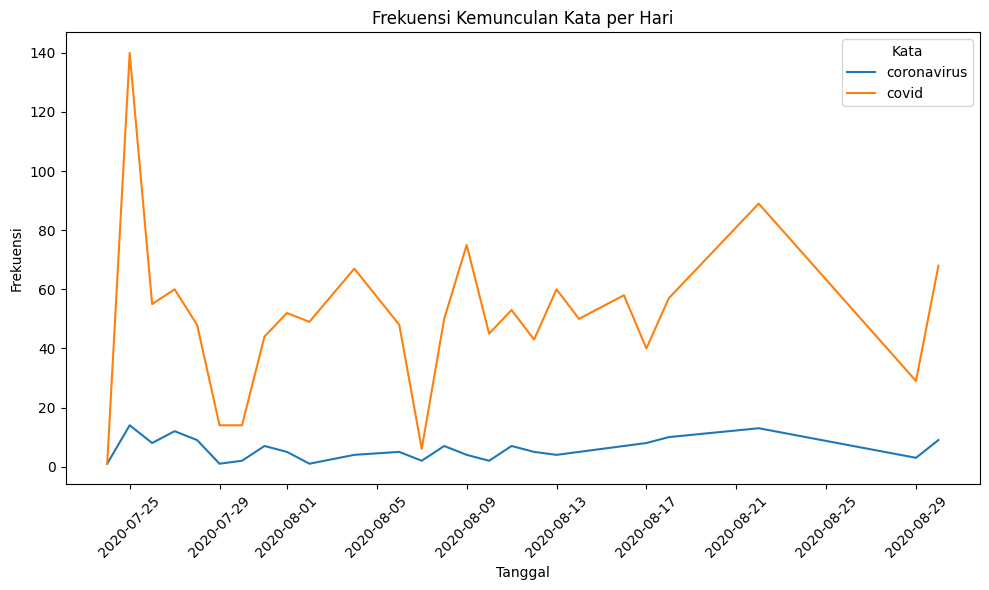

In [39]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Data Anda
data1 = freq_dict_1
data2 = freq_dict_2

# Membuat DataFrame dari data Anda
df1 = pd.DataFrame(list(data1.items()), columns=['Tanggal', 'Frekuensi'])
df1['Kata'] = 'coronavirus'
df2 = pd.DataFrame(list(data2.items()), columns=['Tanggal', 'Frekuensi'])
df2['Kata'] = 'covid'
df_merge = pd.concat([df1, df2])

# Membuat plot
plt.figure(figsize=(10,6))
sns.lineplot(data=df_merge, x='Tanggal', y='Frekuensi', hue='Kata')
plt.xticks(rotation=45)
plt.xlabel('Tanggal')
plt.ylabel('Frekuensi')
plt.title('Frekuensi Kemunculan Kata per Hari')
plt.tight_layout()
plt.show()


In [40]:
freq_dict_2

{datetime.date(2020, 7, 24): 1,
 datetime.date(2020, 7, 25): 140,
 datetime.date(2020, 7, 26): 55,
 datetime.date(2020, 7, 27): 60,
 datetime.date(2020, 7, 28): 48,
 datetime.date(2020, 7, 29): 14,
 datetime.date(2020, 7, 30): 14,
 datetime.date(2020, 7, 31): 44,
 datetime.date(2020, 8, 1): 52,
 datetime.date(2020, 8, 2): 49,
 datetime.date(2020, 8, 4): 67,
 datetime.date(2020, 8, 6): 48,
 datetime.date(2020, 8, 7): 6,
 datetime.date(2020, 8, 8): 50,
 datetime.date(2020, 8, 9): 75,
 datetime.date(2020, 8, 10): 45,
 datetime.date(2020, 8, 11): 53,
 datetime.date(2020, 8, 12): 43,
 datetime.date(2020, 8, 13): 60,
 datetime.date(2020, 8, 14): 50,
 datetime.date(2020, 8, 16): 58,
 datetime.date(2020, 8, 17): 40,
 datetime.date(2020, 8, 18): 57,
 datetime.date(2020, 8, 22): 89,
 datetime.date(2020, 8, 29): 29,
 datetime.date(2020, 8, 30): 68}

In [41]:
df_merge

,Tanggal,Frekuensi,Kata
0,2020-07-24,1,coronavirus
1,2020-07-25,14,coronavirus
2,2020-07-26,8,coronavirus
3,2020-07-27,12,coronavirus
4,2020-07-28,9,coronavirus
5,2020-07-29,1,coronavirus
6,2020-07-30,2,coronavirus
7,2020-07-31,7,coronavirus
8,2020-08-01,5,coronavirus
9,2020-08-02,1,coronavirus


In [42]:
max(freq_dict_2.values())

140

In [43]:
max(freq_dict_1.values())

14

In [44]:
date_datetime = pd.to_datetime('2020-07-25').date()
now = df_grouped['clean_text'].loc[df_grouped['date']== date_datetime]

In [45]:
len(df_grouped.clean_text.iloc[1])

2191

In [46]:
df_grouped.iloc[0]

date                                                 2020-07-24
clean_text    [healthcare, health, wellness, unitedstates, t...
Name: 0, dtype: object

In [47]:
list_now = now.values[0]

In [48]:
len(list_now)

2191

In [49]:
word_counter = {}
for word in set(list_now):
    word_counter[word] = list_now.count(word)


In [50]:
word_counter

{'hobbies': 1,
 'split': 1,
 'ferland': 1,
 'preach': 1,
 'portland': 1,
 'costco': 1,
 'local': 2,
 'pioneer': 1,
 'infe': 1,
 'primary': 1,
 'hanumagarh': 1,
 'ask': 7,
 'disgrace': 1,
 'summarize': 1,
 'coronavirus': 14,
 'afghan': 1,
 'mass': 1,
 'suspend': 2,
 'danger': 1,
 'fnfgyms': 1,
 'cost': 1,
 'scmpgraphics': 2,
 'prevention': 1,
 'lacubanamisfit': 1,
 'mapmyindia': 1,
 'try': 1,
 'home': 1,
 'patrick': 1,
 'mattwalshblog': 1,
 'long': 3,
 'dental': 1,
 'fear': 1,
 'blackheath': 1,
 'brisbane': 1,
 'hc': 1,
 'antimaskers': 1,
 'build': 2,
 'creep': 1,
 'senator': 1,
 'lahederahelix': 1,
 'experience': 2,
 'club': 1,
 'humor': 1,
 'law': 2,
 'save': 1,
 'brand': 1,
 'fine': 1,
 'researcher': 1,
 'coach': 1,
 'currently': 1,
 'rasak': 1,
 'accidents': 1,
 'ever': 2,
 'usgpcancelled': 1,
 'populations': 1,
 'merez': 1,
 'cain': 1,
 'inher': 1,
 'extension': 1,
 'seatbelt': 1,
 'sport': 2,
 'stock': 2,
 'resources': 1,
 'monsoon': 1,
 'bahrain': 1,
 'practice': 3,
 'amid': 3,
 

In [51]:
word_counter.get('coronavirus')

14

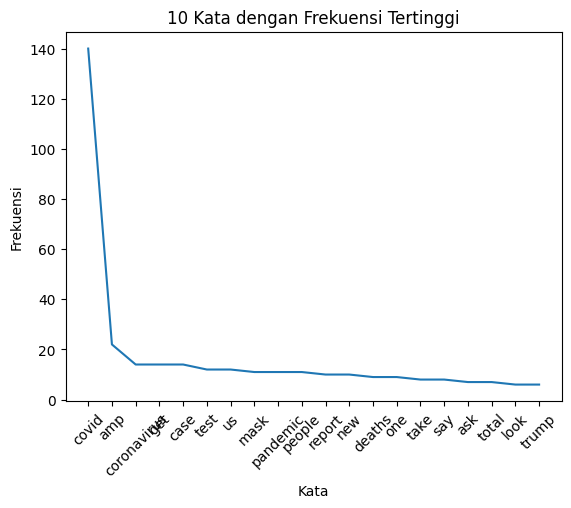

In [52]:

# Mengubah dictionari menjadi DataFrame
df_freq_words = pd.DataFrame(list(word_counter.items()), columns=['Kata', 'Frekuensi'])

# Mengurutkan DataFrame berdasarkan 'Frekuensi' dan memilih 10 kata dengan frekuensi tertinggi
df_freq_words = df_freq_words.sort_values('Frekuensi', ascending=False).head(20)

# Membuat plot garis
fig, ax = plt.subplots()
ax.plot(df_freq_words['Kata'], df_freq_words['Frekuensi'])
plt.xticks(rotation=45)
plt.xlabel('Kata')
plt.ylabel('Frekuensi')
plt.title('10 Kata dengan Frekuensi Tertinggi')

# Menampilkan plot di Streamlit
plt.show()


In [53]:
# frekuensi kemunculan kata 
tweets = df_grouped['clean_text'].values
print(len(tweets))

26


In [54]:
df_end['clean_text'] = df_end['clean_text'].apply(lambda s : ' '.join(eval(s)))

C:\Users\nando\AppData\Local\Temp\ipykernel_22748\1124438245.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_end['clean_text'] = df_end['clean_text'].apply(lambda s : ' '.join(eval(s)))


In [55]:
df_end.head()

,date,hashtags,clean_text
0,2020-08-11,['COVID19'],million case covid case worldwide new case ire...
1,2020-08-17,"['China', 'COVID19', 'Sharjah24']",china grant country first covid vaccine patent...
2,2020-08-01,"['50swomen', 'coronavirus', 'COVID19']",rishisunak keir starmer give swomen pension pr...
3,2020-07-25,['COVID19'],long covid circulate risk thats ask everyone t...
4,2020-08-22,NaN,try best support frontline workers residential...


In [56]:
# from sklearn.feature_extraction.text import TfidfVectorizer

In [57]:
# vectorizer = TfidfVectorizer(use_idf= True, max_df= 0.5, min_df=1, ngram_range=(1,3))

# vectors = vectorizer.fit_transform(df_end['clean_text'])

In [58]:
# Mengubah vektor fitur menjadi DataFrame
# df_vectors = pd.DataFrame.sparse.from_spmatrix(vectors, columns=vectorizer.get_feature_names_out())

# # Menampilkan DataFrame
# df_vectors.head()


In [59]:
# print(print(vectors[0].toarray()))

In [60]:
IDF.get('coronavirus')

2.617295837833746

In [61]:
len(IDF)

6673

In [62]:
# for i in df_grouped['clean_text'].values :
#     print(len(tweets))

In [63]:
# Menggabungkan semua teks dalam kolom 'clean_text'
teks_gabung = ' '.join(df_end['clean_text'])

# Memisahkan teks menjadi kata-kata
kata_kata = teks_gabung.split()

# Membuat set dari kata-kata untuk menghilangkan duplikat
kata_unik = set(kata_kata)

# Menghitung jumlah kata unik
jumlah_kata_unik = len(kata_unik)

#Pembuktian kata unik sama dengan jumlah skor idf
print(jumlah_kata_unik)

6673


### Normalisasi

In [64]:
list_TFIDF = [[v for v in sub_dict.values()] for sub_dict in TFIDF.values()]

In [65]:
for i in range(10) :
    print(list_TFIDF[i])

[0.358189498490434, 0.3873810078523497, 0.20678827490815618, 0.35424386046062245, 0.22668785456804302, 0.5407862509648387, 0.38168039460975567, 0.3935381392118525, 0.4349994084989822, 0.376373250649221, 0.03739484701350917]
[0.5781119096381901, 0.844544717726898, 0.6454603322571142, 0.844544717726898, 0.4266335937609466, 0.844544717726898, 0.05401477901951324, 0.4403684777572996, 0.4666338975422141]
[0.5846848045801603, 0.5846848045801603, 0.5846848045801603, 0.716378996980868, 0.36234851551122443, 0.2013304490641343, 0.5001761669903055, 0.35049077090912767, 0.46088188823907555, 0.03739484701350917, 0.25898430422652485, 0.5846848045801603]
[0.4710530701645918, 0.6907755278982137, 0.5298317366548037, 0.42336066295556085, 0.5298317366548037, 0.5115995809754083, 0.6502290170873972, 0.5115995809754083, 0.048613301117561916, 0.6907755278982137]
[0.30692188822291216, 0.3935381392118525, 0.35424386046062245, 0.33115889181059643, 0.5846848045801603, 0.5001761669903055, 0.5001761669903055, 0.37

In [66]:
import math

def normalize_l2(vector_dict):
    vector = list(vector_dict.values())
    vector = [float(x) for x in vector]
    norm = math.sqrt(sum(x**2 for x in vector))
    normalized_vector = [x/norm for x in vector]
    return dict(zip(vector_dict.keys(), normalized_vector))

normalized_TFIDF = {doc_id: normalize_l2(doc_scores) for doc_id, doc_scores in TFIDF.items()}

In [67]:
normalized_TFIDF

{0: {'increase': 0.3002390894422635,
  'st': 0.32470779169959935,
  'new': 0.17333261758766885,
  'million': 0.2969318044036682,
  'people': 0.1900127036944584,
  'case': 0.45329405875062184,
  'past': 0.3199294636457839,
  'worldwide': 0.32986877916780927,
  'ireland': 0.36462215354185107,
  'week': 0.31548094665417675,
  'covid': 0.03134484641366052},
 1: {'china': 0.3095801927463695,
  'cansino': 0.4522555445371327,
  'grant': 0.34564542044351076,
  'patent': 0.4522555445371327,
  'vaccine': 0.22846322310026515,
  'sharjah': 0.4522555445371327,
  'covid': 0.02892503237042604,
  'first': 0.2358182835376139,
  'country': 0.24988347331145383},
 2: {'keir': 0.3554096322807182,
  'starmer': 0.3554096322807182,
  'pension': 0.3554096322807182,
  'give': 0.4354619683906858,
  'job': 0.220259106524552,
  'coronavirus': 0.1223818035089463,
  'rishisunak': 0.30403975987241805,
  'protect': 0.21305119447399676,
  'yo': 0.2801541294399001,
  'covid': 0.02273103169802471,
  'us': 0.1574275842480

In [68]:
TFIDF[0]

{'increase': 0.358189498490434,
 'st': 0.3873810078523497,
 'new': 0.20678827490815618,
 'million': 0.35424386046062245,
 'people': 0.22668785456804302,
 'case': 0.5407862509648387,
 'past': 0.38168039460975567,
 'worldwide': 0.3935381392118525,
 'ireland': 0.4349994084989822,
 'week': 0.376373250649221,
 'covid': 0.03739484701350917}

In [69]:
# Mengurutkan TFIDF
sorted_tfidf = sorted([(term, score) for doc_id, terms in normalized_TFIDF.items() for term, score in terms.items()], key=lambda x: x[1], reverse=True)

In [70]:
sorted_tfidf

[('briantylercohen', 0.9979609868278377),
 ('x', 0.9969544536810733),
 ('fuck', 0.9961464922973958),
 ('guy', 0.9855397472741076),
 ('case', 0.9791533288127543),
 ('pip', 0.8716396055036632),
 ('coronainfoch', 0.8675983111885631),
 ('twitter', 0.8643248058061938),
 ('goodpeople', 0.8587144299861629),
 ('bad', 0.846761153441321),
 ('jersey', 0.8416525049963842),
 ('gt', 0.8341538457786566),
 ('come', 0.8193225913365998),
 ('finland', 0.8115419017140986),
 ('shopprsdrugmart', 0.8052749481340548),
 ('fridaymorning', 0.8047652618699056),
 ('janmashtami', 0.7999007107918782),
 ('finance', 0.7926973904780096),
 ('nothing', 0.7918880641030352),
 ('coronoavirus', 0.7908238661902086),
 ('edt', 0.7858290955805306),
 ('costly', 0.7790221971425052),
 ('jobkeeper', 0.7738256519963927),
 ('gazaonline', 0.7706371493089773),
 ('notgoneaway', 0.7631376802685705),
 ('fake', 0.7621128190041083),
 ('kenjapala', 0.7614905193058085),
 ('wheretheemergency', 0.7589911838994117),
 ('medicine', 0.75331397773410

In [71]:
worde, normal = zip(*sorted_tfidf)

In [72]:
len(normalized_TFIDF)

2000

In [73]:
n = 100
top_features = {term: score for term, score in sorted_tfidf[:n]}

In [74]:
top_features

{'briantylercohen': 0.9979609868278377,
 'x': 0.9969544536810733,
 'fuck': 0.9961464922973958,
 'guy': 0.9855397472741076,
 'case': 0.9791533288127543,
 'pip': 0.8716396055036632,
 'coronainfoch': 0.8675983111885631,
 'twitter': 0.8643248058061938,
 'goodpeople': 0.8587144299861629,
 'bad': 0.846761153441321,
 'jersey': 0.8416525049963842,
 'gt': 0.6725758810750337,
 'come': 0.8193225913365998,
 'finland': 0.8115419017140986,
 'shopprsdrugmart': 0.8052749481340548,
 'fridaymorning': 0.8047652618699056,
 'janmashtami': 0.7999007107918782,
 'finance': 0.7926973904780096,
 'nothing': 0.7918880641030352,
 'coronoavirus': 0.7908238661902086,
 'edt': 0.7858290955805306,
 'costly': 0.7790221971425052,
 'jobkeeper': 0.7738256519963927,
 'gazaonline': 0.7706371493089773,
 'notgoneaway': 0.7631376802685705,
 'fake': 0.7621128190041083,
 'kenjapala': 0.7614905193058085,
 'wheretheemergency': 0.7589911838994117,
 'medicine': 0.753313977734104,
 'korea': 0.7473948355237835,
 'start': 0.746722021120

In [75]:
tfidf_selected = {doc_id: {term: score for term, score in terms.items() if term in top_features} for doc_id, terms in normalized_TFIDF.items()}

In [76]:
tfidf_selected

{0: {'case': 0.45329405875062184},
 1: {},
 2: {},
 3: {},
 4: {},
 5: {},
 6: {},
 7: {'janmashtami': 0.7999007107918782},
 8: {},
 9: {},
 10: {},
 11: {'active': 0.35638545389487597},
 12: {},
 13: {},
 14: {},
 15: {},
 16: {},
 17: {'get': 0.13579371319968433},
 18: {},
 19: {'stay': 0.23195585147412526},
 20: {'get': 0.15016531033264033},
 21: {},
 22: {},
 23: {},
 24: {},
 25: {},
 26: {'true': 0.4678366034550985},
 27: {},
 28: {},
 29: {},
 30: {},
 31: {},
 32: {},
 33: {'social': 0.23319829049382554, 'distance': 0.23319829049382554},
 34: {},
 35: {'test': 0.11963922444020378},
 36: {},
 37: {},
 38: {},
 39: {},
 40: {'medicine': 0.291228477682724},
 41: {},
 42: {},
 43: {},
 44: {},
 45: {'see': 0.189125718730068,
  'safe': 0.2255205976639284,
  'stay': 0.20928267459866504,
  'distance': 0.23481715513229517},
 46: {'see': 0.19262384010626166},
 47: {'big': 0.23794655705259485},
 48: {},
 49: {},
 50: {'get': 0.14309831848410987},
 51: {},
 52: {},
 53: {},
 54: {},
 55: 

In [77]:
tfidf_selected = {doc_id: {term: score for term, score in terms.items() if term in top_features} for doc_id, terms in normalized_TFIDF.items()}
tfidf_selected = {doc_id: {term: 0 if term not in tfidf_selected[doc_id] else tfidf_selected[doc_id][term] for term in top_features} for doc_id in tfidf_selected}

In [78]:
num_docs, num_features = len(tfidf_selected), len(top_features)
tfidf_matrix = np.zeros((num_docs, num_features))

for i, doc_id in enumerate(tfidf_selected):
    for j, term in enumerate(top_features):
        tfidf_matrix[i, j] = tfidf_selected[doc_id].get(term, 0)

In [79]:
len(tfidf_matrix[0])

97

In [80]:
len(top_features) # Jumlah kata unik yang ada

97

In [81]:
len(sorted_tfidf)

19790

In [82]:
tfidf_matrix[0]

array([0.        , 0.        , 0.        , 0.        , 0.45329406,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [83]:
tfidf_dataframe = pd.DataFrame(tfidf_matrix, columns=top_features, index=tfidf_selected.keys())

In [84]:
tfidf_dataframe.head()

,briantylercohen,x,fuck,guy,case,pip,coronainfoch,twitter,goodpeople,bad,...,smdh,myanmar,bitcoin,territories,sport,urns,sudhareddy,windsor,dept,fema
0,0.0,0.0,0.0,0.0,0.453294,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [85]:
# df['sentiment'] = df['text'].apply(lambda x: 'netral' if 'netral' in x else ('positive' if 'positive' in x else 'negatif'))


In [86]:
df.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet,sentiments,clean_text
0,Acute_Hospital_MD,Ireland,University Hospital Consultant. Clinical Lec...,2012-12-04 09:30:06,5696,3667,32465,False,2020-08-11 09:20:04,🦠20 million case of #COVID19 cases worldwide. ...,['COVID19'],Twitter for iPhone,False,0,"['million', 'case', 'covid', 'case', 'worldwid..."
1,الشارقة24,دولة الإمارات العربية المتحدة,الشارقة 24 هو موقع إلكتروني إخباري تابع لحكومة...,2014-11-11 06:44:55,32303,317,12,True,2020-08-17 05:44:47,#China grants country's first #COVID19 vaccine...,"['China', 'COVID19', 'Sharjah24']",Twitter Web App,False,0,"['china', 'grant', 'country', 'first', 'covid'..."
2,J Wood,NaN,Locked out of main account regularly getting s...,2020-05-26 06:56:14,148,348,4842,False,2020-08-01 16:19:46,@RishiSunak @Keir_Starmer give #50swomen our P...,"['50swomen', 'coronavirus', 'COVID19']",Twitter Web App,False,0,"['rishisunak', 'keir', 'starmer', 'give', 'swo..."
3,Afzal Bhuiyan,Bangladesh,NaN,2013-06-06 11:06:02,91,85,20,False,2020-07-25 09:22:35,"As long as #COVID19 is circulating, we are all...",['COVID19'],Twitter for Android,False,0,"['long', 'covid', 'circulate', 'risk', 'thats'..."
4,Angela Leung,Hong Kong,"Associate Professor, School of Nursing, The Ho...",2016-11-16 14:38:19,114,106,78,False,2020-08-22 08:15:46,We try our best to support the frontline worke...,NaN,Twitter for iPhone,False,0,"['try', 'best', 'support', 'frontline', 'worke..."


# Klasifikasi

In [87]:
# import numpy as np
# from sklearn.model_selection import train_test_split
# # Memisahkan data menjadi data latih dan data uji
# y =  df['sentiments']
# X_train, X_test, y_train, y_test = train_test_split(tfidf_matrix, y, test_size=0.2, random_state=42)

# # Fungsi untuk menghitung jarak Euclidean
# def euclidean_distance(x1, x2):
#     return np.sqrt(np.sum((x1 - x2) ** 2))

# # Fungsi untuk mencari k tetangga terdekat
# def find_k_nearest_neighbors(X_train, y_train, x_test, k):
#     distances = []
#     for i, x in enumerate(X_train):
#         dist = euclidean_distance(x, x_test)
#         distances.append((dist, y_train[i]))
#     distances.sort(key=lambda x: x[0])
#     k_nearest_neighbors = distances[:k]
#     return k_nearest_neighbors

# # Fungsi untuk memprediksi kelas
# def predict_class(k_nearest_neighbors):
#     classes, counts = np.unique([x[1] for x in k_nearest_neighbors], return_counts=True)
#     return classes[np.argmax(counts)]

# # Fungsi untuk melatih model
# def train(X_train, y_train, X_test, y_test, k):
#     y_pred = []
#     for x_test in X_test:
#         k_nearest_neighbors = find_k_nearest_neighbors(X_train, y_train, x_test, k)
#         y_pred.append(predict_class(k_nearest_neighbors))
#     accuracy = np.mean(y_pred == y_test)
#     return accuracy

# # Melatih model
# accuracy = train(X_train, y_train, X_test, y_test, k=5)
# print("Accuracy:", accuracy)

In [88]:

# def train_test_split(data, labels, test_size, random_state=None):
#     if random_state is not None:
#         np.random.seed(random_state)

#     num_samples = len(data)
#     indices = np.arange(num_samples)
#     np.random.shuffle(indices)

#     num_test_samples = int(test_size * num_samples)

#     test_indices = indices[:num_test_samples]
#     train_indices = indices[num_test_samples:]

#     X_train = [data[i] for i in train_indices]
#     y_train = [labels[i] for i in train_indices]
#     X_test = [data[i] for i in test_indices]
#     y_test = [labels[i] for i in test_indices]

#     return X_train, X_test, y_train, y_test

import random
import numpy as np

def train_test_split(X, y, test_size=0.2, random_state=None):
    if random_state is not None:
        random.seed(random_state)

    X_train = []
    X_test = []
    y_train = []
    y_test = []

    n_samples = len(X)
    n_test = int(n_samples * test_size)
    n_train = n_samples - n_test

    indices = list(range(n_samples))
    random.shuffle(indices)

    for i in range(n_train):
        X_train.append(X[indices[i]])
        y_train.append(y[indices[i]])

    for i in range(n_test):
        X_test.append(X[indices[n_train + i]])
        y_test.append(y[indices[n_train + i]])

    return np.array(X_train), np.array(X_test), np.array(y_train), np.array(y_test)

In [89]:
X = tfidf_matrix 
Y = df['sentiments']

In [90]:
X_train , X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

In [91]:
len(X_train)

1600

In [92]:
len(X_test)

400

In [93]:
len(X_train) + len(X_test)

2000

In [94]:
len(y_test)

400

In [95]:
X_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [96]:
X_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [97]:
y_test

array([1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 2, 2, 1, 2, 1, 0, 0, 0, 0, 0, 1, 2,
       2, 1, 2, 2, 2, 2, 0, 1, 2, 2, 0, 1, 0, 1, 0, 2, 2, 0, 1, 2, 1, 0,
       0, 2, 2, 0, 1, 2, 0, 0, 1, 1, 0, 0, 1, 2, 0, 2, 0, 1, 2, 2, 0, 0,
       0, 2, 1, 2, 1, 0, 0, 1, 2, 2, 0, 2, 1, 1, 1, 1, 1, 2, 2, 0, 0, 1,
       2, 2, 2, 0, 1, 1, 1, 2, 0, 2, 0, 1, 2, 0, 0, 1, 2, 1, 0, 0, 0, 0,
       1, 2, 0, 0, 2, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2,
       0, 2, 0, 2, 2, 2, 2, 0, 1, 1, 1, 2, 0, 1, 1, 2, 0, 0, 2, 1, 2, 0,
       2, 1, 2, 0, 2, 2, 0, 0, 0, 0, 2, 2, 1, 0, 0, 1, 0, 1, 0, 1, 2, 1,
       0, 2, 1, 2, 2, 2, 2, 1, 2, 0, 1, 2, 0, 1, 0, 2, 1, 0, 2, 2, 2, 0,
       1, 0, 1, 0, 2, 2, 1, 2, 2, 2, 1, 2, 0, 2, 2, 0, 2, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 2, 2, 2, 0, 1, 0, 0, 2, 0, 2, 0, 1, 1, 0, 2, 1, 1, 1,
       2, 1, 1, 2, 0, 1, 2, 2, 0, 2, 0, 0, 1, 1, 2, 1, 1, 2, 0, 0, 2, 2,
       1, 0, 0, 0, 1, 0, 2, 2, 2, 0, 0, 2, 2, 2, 0, 2, 0, 1, 2, 1, 0, 1,
       1, 0, 2, 2, 1, 0, 1, 1, 0, 1, 2, 2, 0, 2, 0,

### X_train.ndim

In [98]:
type(y_train)

numpy.ndarray

# Klasifikasi

In [99]:
# import numpy as np

# class myKNNclassifier():
#     def __init__(self, neighbours=5):
#         self.neighbours = neighbours
#         self.X_train = None
#         self.y_train = None

#     def fit(self, X_train, y_train):
#         self.X_train = X_train
#         self.y_train = y_train

#     def predict(self, X_test):
#         predictions = []
#         for x in X_test:
#             distances = np.sum((self.X_train - x)**2, axis=1)
#             k_indices = np.argpartition(distances, self.neighbours)[:self.neighbours]
#             k_nearest_labels = self.y_train[k_indices]
#             # Majority vote
#             values, counts = np.unique(k_nearest_labels, return_counts=True)
#             majority_vote = values[np.argmax(counts)]
#             predictions.append(majority_vote)
#         return np.array(predictions)



In [100]:
EUCLIDEAN = 'euclidean'
MANHATTAN = 'manhattan'
CHEBYSEV = 'chebysev'

class myKNNclassifier():

    def __init__(self, neighbours: int = 5, metric: str = EUCLIDEAN):
        self.neighbours = neighbours
        self.metric = metric

    def compute_distance(self, v1: np.ndarray, v2: np.ndarray): 
        assert v1.size == v2.size

        if(self.metric == EUCLIDEAN):
            distances = [ (v1[i] - v2[i])**2 for i in range(v1.size)]
            return math.sqrt(sum(distances))
        if(self.metric == MANHATTAN):
            distances = [ abs(v1[i] - v2[i]) for i in range(v1.size)]
            return sum(distances)
        if(self.metric == CHEBYSEV): 
            distances = [ abs( v1[i] - v2[i]) for i in range(v1.size)]
            return max(distances)

    def compute_nearest_neighbours(self, v1: np.ndarray, X: np.ndarray):
        distances = [self.compute_distance(v1, v) for v in X]
        distances = list(enumerate(distances))
        return sorted(distances, key=lambda v: v[1])[:self.neighbours]


    def fit(self, X_train: np.ndarray, y_train: np.ndarray, X_test: np.ndarray):
        neighbours = []
        predictions = []
        for x in X_test:
            neighbours.append(self.compute_nearest_neighbours(x, X_train))

     
        for i in range(len(X_test)):
            closestPoints =  [v[0] for v in neighbours[i]]
            y_values = list(np.array(y_train)[closestPoints])
            predictions.append(max(set(y_values), key=y_values.count))
        return np.array(predictions)
        
    def get_params(self):
        return {
            'neighbours': self.neighbours,
            'metric': self.metric,
        }

In [101]:
knn = myKNNclassifier(neighbours=7, metric='euclidean')

y_pred = knn.fit(X_train, y_train, X_test)

print(y_pred)
print(y_test)

[2 2 1 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 1 2 0 2 1 2 0 2 2 2 2 2 2 2 2 2 1
 2 2 0 1 0 0 2 0 2 2 2 2 2 2 2 2 1 2 0 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 0
 2 2 2 2 2 2 2 1 2 2 2 0 0 2 2 1 1 2 1 2 2 2 1 2 0 2 2 2 0 2 2 2 0 0 2 1 2
 2 2 2 2 2 2 2 2 2 2 0 2 1 1 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 0 2 1 1 2 2 2 1 2 2 2 1 2 2 1 2 2 2 1 2 2 2 2 2 2 1 2 2 0 0 0 2 2 2 2 2 2
 2 1 2 2 2 2 2 2 2 2 1 2 2 2 2 2 1 2 0 2 0 2 2 1 2 2 2 2 2 2 2 0 2 2 1 0 2
 0 2 0 2 2 2 2 0 2 2 2 2 0 2 1 0 2 2 0 2 2 2 2 0 2 2 2 2 0 2 2 2 2 2 2 1 2
 2 2 0 2 2 2 2 1 2 2 0 2 2 0 0 2 2 2 2 2 2 2 2 2 2 2 1 2 2 0 2 2 2 2 2 1 1
 2 2 0 2 1 2 2 2 1 2 2 0 2 2 0 2 2 2 1 2 0 2 2 2 2 2 2 1 2 2 2 2 0 2 2 1 0
 0 2 2 1 0 2 2 2 2 2 2 2 1 2 2 0 2 2 2 0 1 2 1 1 2 0 2 2 2 2 2 2 0 2 2 1 2
 1 0 2 1 2 2 2 1 2 0 2 2 2 2 1 2 2 0 1 2 2 2 0 2 2 2 1 2 2 2]
[1 0 0 1 1 1 1 0 0 0 2 2 1 2 1 0 0 0 0 0 1 2 2 1 2 2 2 2 0 1 2 2 0 1 0 1 0
 2 2 0 1 2 1 0 0 2 2 0 1 2 0 0 1 1 0 0 1 2 0 2 0 1 2 2 0 0 0 2 1 2 1 0 0 1
 2 2 0 2 1 1 1 1 1 2 2 0 0 1 2 2 2 0 1

In [102]:
class KNNEvaluator():

    def __init__(self,model, y_pred: np.array, y_test: np.array, y: np.array):
        self.model = model
        self.y_pred = y_pred
        self.y_test = y_test
        self.y = y
        self.all_possible_values = np.unique(y)
        

    def myConfMat(self) -> np.array:
        """ 
        Build a dictionary to store the indexes of the possible values: 
        Example: 
            possible_values = ['a', 'b', 'c']
            indexesDict = { 'a': 0, 'b': 1, 'c': 2}
        """
        indexes = map(lambda y: [y[1], y[0]], list(enumerate(self.all_possible_values)))
        indexDict = dict(indexes)
        unique_values = np.unique(np.concatenate((y_test,y_pred)))

        classno = len(self.all_possible_values)
        C = np.array([[0]*classno]*classno)
        for i in range(len(self.y_test)):
            C[indexDict[self.y_test[i]]][indexDict[self.y_pred[i]]] += 1

        return C

    def myAccuracy(self) -> float:
        matrix: np.array = self.myConfMat()
        A = np.sum(np.diagonal(matrix))/len(self.y_test)
        return A 


    def myPrecision(self):
        classes = np.unique(self.y_test)
        guesses = {}
        classCounts = []
        for cl in classes:
            classCounts.append( list(self.y_test).count(cl))
        precision = np.zeros(np.shape(classes))
        aggr = list(zip(self.y_test, self.y_pred))
        for el in aggr:
            if(el[0] == el[1]):
                try:
                    guesses[el[0]] += 1
                except:
                    guesses[el[0]] = 1
        
        for idx, cl in enumerate(classCounts):
            precision[idx] = guesses[idx]/cl

        return precision


    def pretty_print_results(self):
        c = self.myConfMat()
        header = self.all_possible_values
        df = pd.DataFrame(c, columns=[ f'{head}_pred' for head in header])
        df.index.set_names('Real', inplace=True)
        print('------------------------------------')
        print('Confusion matrix of the KNN model: ')
        print(df)
        print('------------------------------------')
        print('Accuracy of the model: ')
        print(self.myAccuracy())
        print('------------------------------------')
        print('Precision of the model: ')
        print(self.myPrecision())
        print('------------------------------------')



In [103]:
# test evaluation code

evaluator = KNNEvaluator(None,y_pred, y_test, Y)

c = evaluator.myConfMat()
a = evaluator.myAccuracy()
evaluator.pretty_print_results()

------------------------------------
Confusion matrix of the KNN model: 
      0_pred  1_pred  2_pred
Real                        
0         30      14      95
1         12      27      86
2         12       9     115
------------------------------------
Accuracy of the model: 
0.43
------------------------------------
Precision of the model: 
[0.21582734 0.216      0.84558824]
------------------------------------


In [104]:
from itertools import chain
nFolds = 3

def find_best_model(models: list) -> dict:
    best_accuracy = 0
    best_model = None
    for model in models: 
        if model['accuracy'] > best_accuracy:
            best_accuracy = model['accuracy']
            best_model = model
    
    return best_model


# myNestedCrossVal code
        
def myCrossVal(X: np.ndarray,y: np.ndarray ,nFolds: int, neighboursRange: int, distances: list,  mySeed: int) -> dict:
    accuracy_fold=[] #list to store accuracies folds

    for distance in distances:
        assert distance in [EUCLIDEAN, MANHATTAN, CHEBYSEV], f'Distance provided must be one of {EUCLIDEAN}, {MANHATTAN}, {CHEBYSEV}'
        
    
    L = list(range(X.shape[0]))
    np.random.seed(mySeed)
    indices=np.random.permutation(L)
    
    #Split the indices into different bins (nFolds)
    bins=np.array_split(indices, nFolds)
    bestModel = {
        'fold' : 0,
        'accuracy' : 0,
        'distance' : None,
        'neighbours' : None,
        'evaluator' : None
    }
    models : List[dict] = []
    accuracies_per_fold = []
    #loop through folds
    
    for i in range(0,nFolds):
        fold_accuracies = []
        testIndexes: list(int) = bins[i]
        flattened_bins = [item for sublist in bins for item in sublist]
        complementaryIndexes = [val for j, val in enumerate(flattened_bins) if j != i]
        X_train: np.ndarray = X[complementaryIndexes]
        y_train: np.ndarray = y[complementaryIndexes]
        X_test = X[testIndexes]
        y_test = y[testIndexes]

        #reset Index
        y_test = y_test.reset_index(drop=True)
        # y_pred = y_pred.reset_index(drop=True)
        
        for distance in distances:
            for neighbours in range(2,neighboursRange + 1):
                knn = myKNNclassifier(neighbours=neighbours, metric=distance)

                y_pred = knn.fit(X_train, y_train, X_test)
                # y_pred = y_pred.reset_index(drop=True)
                
                evaluator: KNNEvaluator = KNNEvaluator(knn, y_pred, y_test, y)
                accuracy_fold.append(evaluator.myAccuracy())
                models.append({
                            'fold' : i,
                            'accuracy' : evaluator.myAccuracy(),
                            'distance' : distance,
                            'neighbours' : neighbours,
                            'evaluator' : evaluator,
                            'model' : knn
                        })

                # print(f'Fold {i}. Distance {distance.name}, neighbours {neighbours}. Accuracy: {evaluator.myAccuracy()}')
                print(f'Fold {i}. Distance {distance}, neighbours {neighbours}. Accuracy: {evaluator.myAccuracy()}')

                fold_accuracies.append(evaluator.myAccuracy())
                if(evaluator.myAccuracy() > bestModel['accuracy']):
                    bestModel['fold'] = i
                    bestModel['accuracy']= evaluator.myAccuracy()
                    bestModel['distance'] = distance
                    bestModel['neighbours'] = neighbours
                    bestModel['evaluator'] = evaluator
                    bestModel['model'] = knn

        # Print accuracy per fold, best set of parameters, and confusion matrix
        print(f'Fold {i}, accuracy: {np.mean(np.array(fold_accuracies))}')
        fold_models = [model for model in models if model['fold'] == i]
        
        best_model = find_best_model(fold_models)
        print(f"Best set of parameters: Distance = {best_model['distance']}. Neighbours = {best_model['neighbours']}")
        print('Confusion matrix: ')
        print(best_model['evaluator'].myConfMat())
        accuracies_per_fold.append(np.mean(np.array(fold_accuracies)))


       
    return [bestModel, models, accuracies_per_fold]

# evaluate clean data code
mySeed = 3
bestModel, results, accuracies = myCrossVal(X, Y, 3, 10, [EUCLIDEAN, MANHATTAN, CHEBYSEV], mySeed)
print(bestModel['distance'])
print(bestModel['neighbours'])
bestModel['evaluator'].pretty_print_results()

Fold 0. Distance euclidean, neighbours 2. Accuracy: 0.45577211394302847
Fold 0. Distance euclidean, neighbours 3. Accuracy: 0.4497751124437781
Fold 0. Distance euclidean, neighbours 4. Accuracy: 0.4407796101949025
Fold 0. Distance euclidean, neighbours 5. Accuracy: 0.46326836581709147
Fold 0. Distance euclidean, neighbours 6. Accuracy: 0.44377811094452774
Fold 0. Distance euclidean, neighbours 7. Accuracy: 0.4497751124437781
Fold 0. Distance euclidean, neighbours 8. Accuracy: 0.4332833583208396
Fold 0. Distance euclidean, neighbours 9. Accuracy: 0.4272863568215892
Fold 0. Distance euclidean, neighbours 10. Accuracy: 0.41529235382308843
Fold 0. Distance manhattan, neighbours 2. Accuracy: 0.4572713643178411
Fold 0. Distance manhattan, neighbours 3. Accuracy: 0.4512743628185907
Fold 0. Distance manhattan, neighbours 4. Accuracy: 0.44227886056971516
Fold 0. Distance manhattan, neighbours 5. Accuracy: 0.4662668665667166
Fold 0. Distance manhattan, neighbours 6. Accuracy: 0.4452773613193403


In [105]:
# from pandas.plotting import scatter_matrix

# def myPlot(X: np.ndarray, y: np.ndarray):
#     df = pd.DataFrame(data=X)
#     colors = list()
#     colorMap = {0: 'red', 1: 'blue', 2: 'green'}
#     for val in y:
#         colors.append(colorMap[val])

#     scatter_matrix(df, alpha=0.8, diagonal='hist', c=colors, figsize=(10,10))
mySeed = 123
np.random.seed(mySeed)
XN = X + np.random.normal(0, 0.5, X.shape)

# myPlot(XN, Y)

In [106]:
bestModelN, resultsN, accuraciesN = myCrossVal(XN, Y, 3, 10, ['euclidean', 'manhattan', 'chebysev'], mySeed)
print(bestModelN['distance'])
print(bestModelN['neighbours'])
bestModelN['evaluator'].pretty_print_results()


Fold 0. Distance euclidean, neighbours 2. Accuracy: 0.6596701649175413
Fold 0. Distance euclidean, neighbours 3. Accuracy: 0.638680659670165
Fold 0. Distance euclidean, neighbours 4. Accuracy: 0.5877061469265368
Fold 0. Distance euclidean, neighbours 5. Accuracy: 0.545727136431784
Fold 0. Distance euclidean, neighbours 6. Accuracy: 0.5337331334332833
Fold 0. Distance euclidean, neighbours 7. Accuracy: 0.5067466266866567
Fold 0. Distance euclidean, neighbours 8. Accuracy: 0.5022488755622189
Fold 0. Distance euclidean, neighbours 9. Accuracy: 0.49775112443778113
Fold 0. Distance euclidean, neighbours 10. Accuracy: 0.5097451274362819
Fold 0. Distance manhattan, neighbours 2. Accuracy: 0.6881559220389805
Fold 0. Distance manhattan, neighbours 3. Accuracy: 0.6251874062968515
Fold 0. Distance manhattan, neighbours 4. Accuracy: 0.6146926536731634


KeyboardInterrupt: 

In [294]:
def get_best_models(results: dict):
    highestAccuracies = [0,0,0,0,0]
    bestFolds = [None, None, None, None, None]
    for result in results: 
        if highestAccuracies[result['fold']] < result['accuracy']:
            bestFolds[result['fold']] = result
            highestAccuracies[result['fold']] = result['accuracy']

    accuracies = [x['accuracy'] for x in bestFolds]
    std = np.std([x['accuracy'] for x in bestFolds])        
    mean = np.mean([x['accuracy'] for x in bestFolds])   

    return [bestFolds, std, mean]

print('Data without noise: ')
print(get_best_models(results))
print('--------------------')
print('Data with noise: ')
print(get_best_models(resultsN))

Data without noise: 


TypeError: 'NoneType' object is not subscriptable

In [ ]:
def build_summary_conf_mat(results):
    summaryMat = np.ndarray(shape=results[0]['evaluator'].myConfMat().shape)
    mean_conf_mat = np.mean([result['evaluator'].myConfMat() for result in results], axis=0)
    dataframe = pd.DataFrame(data=mean_conf_mat, columns=['0_pred', '1_pred', '2_pred'])
    dataframe.index.set_names('REAL', inplace=True)
    return dataframe
print('CLEAN')
print(build_summary_conf_mat(results))
print('NOISY')
print(build_summary_conf_mat(resultsN))


In [ ]:
# import numpy as np

# # Get the best-performing models for the dataset without noise
# best_models_no_noise = get_best_models(results)

# # Extract the best-performing model for fold 4
# best_model_no_noise = best_models_no_noise[0][4]['model']

# # Save the best-performing model for the dataset without noise to disk as a NumPy array
# model_params_no_noise = best_model_no_noise.get_params()
# np.save('best_model_no_noise.npy', model_params_no_noise)

In [ ]:
print(best_models_no_noise[0][4])


In [ ]:
import numpy as np

# Get the best-performing models for the datasets without and with noise
best_models_no_noise = get_best_models(results)
best_models_with_noise = get_best_models(resultsN)

# Extract the best-performing model for fold 0, 2, and 4 for the dataset without noise
best_model_no_noise = [best_models_no_noise[0][i]['model'] for i in [0, 2, 4]]

# Extract the best-performing model for fold 0, 1, 2, 3, and 4 for the dataset with noise
best_model_with_noise = [best_models_with_noise[0][i]['model'] for i in [0, 1, 2, 3, 4]]

# Save the best-performing models for the datasets without and with noise to disk as NumPy arrays
np.save('best_model_no_noise.npy', best_model_no_noise)
np.save('best_model_with_noise.npy', best_model_with_noise)

In [ ]:
len(model_params_no_noise)

In [ ]:
import numpy as np

# Fungsi untuk mengubah kata-kata menjadi vektor fitur
def vectorize_words(words, unique_words):
    # Buat dictionary untuk menyimpan vektor fitur
    feature_vectors = {}
    for word in unique_words:
        # Buat vektor fitur untuk kata ini
        feature_vector = [1 if w == word else 0 for w in words]
        # Simpan vektor fitur ini di dictionary
        feature_vectors[word] = feature_vector
    return feature_vectors

# Fungsi untuk memprediksi sentimen tweet
def predict_sentiment(tweet, models, unique_words):
    # Preprocess teks tweet
    words = preprocess_tweet(tweet)
    # Ubah list kata menjadi array numpy
    X = np.array(words)
    # Gunakan setiap model yang dilatih untuk memprediksi label sentimen 
    sentiment_labels = []
    for model in models:
        # Ubah kata-kata menjadi vektor fitur
        X_vectorized = vectorize_words(X, unique_words)
        print(X_vectorized)
        # Gunakan model yang dilatih untuk memprediksi label sentimen
        sentiment_index = model.fit(X_vectorized, y_train, X_vectorized)  # asumsi model memiliki metode 'fit'
        sentiment_label = model.classes_[sentiment_index]
        sentiment_labels.append(sentiment_label)
    # Cetak label sentimen yang diprediksi oleh setiap model
    print('Sentiment labels predicted by each model:')
    for i, model in enumerate(models):
        print(f'Model {i+1}: {sentiment_labels[i]}')

# Load the best-performing models for the datasets without and with noise from disk as NumPy arrays
model_params_no_noise = np.load('best_model_no_noise.npy', allow_pickle=True)
model_params_with_noise = np.load('best_model_with_noise.npy', allow_pickle=True)

# Collect all unique words from the entire dataset (training + testing)
unique_words = top_features  # replace this with the actual set of unique words

# Predict the sentiment of a new tweet using both trained models
user_input = 'coronavirus is fucking chinese propaganda fuck'
predict_sentiment(user_input, model_params_no_noise, unique_words)
predict_sentiment(user_input, model_params_with_noise, unique_words)



In [ ]:
# Load the best-performing models for the datasets without and with noise from disk as dictionaries
model_params_no_noise = np.load('best_model_no_noise.npy', allow_pickle=True)
model_params_with_noise = np.load('best_model_with_noise.npy', allow_pickle=True)

In [ ]:
model_params_no_noise

In [ ]:
model_params_with_noise

In [ ]:
X_train[0]